<a href="https://colab.research.google.com/github/ygeszvain/projects/blob/master/Commute_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [355]:
!pip install fbprophet
!pip install plotly

In [0]:
import timeit
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import plotly
plotly.tools.set_credentials_file(username='ygeszvain', api_key='OyNA6ynxiLYhCh4JiuQF')

# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
#from pyvttbl import DataFrame # Anova
from scipy import stats
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import linear_model
from shapely.geometry import Point, Polygon
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [357]:
commute = pd.read_csv('commute2015.csv', sep=',', error_bad_lines=False, encoding = "ISO-8859-1")
commute.columns = ['state_name','country_name','commute_counts','margin_of_error']
commute.head(20)

,state_name,country_name,commute_counts,margin_of_error
0,Alabama,Autauga County,8828,752
1,Alabama,Autauga County,6,10
2,Alabama,Autauga County,504,228
3,Alabama,Autauga County,27,44
4,Alabama,Autauga County,296,130
5,Alabama,Autauga County,2186,486
6,Alabama,Autauga County,14,23
7,Alabama,Autauga County,271,142
8,Alabama,Autauga County,8,16
9,Alabama,Autauga County,79,108


In [358]:
# review null values in commute

commute.apply(lambda x: sum(x.isnull()),axis=0)

state_name         0
country_name       0
commute_counts     0
margin_of_error    0
dtype: int64

In [359]:
commute.shape

(139433, 4)

In [360]:
commute.dtypes

state_name         object
country_name       object
commute_counts      int64
margin_of_error     int64
dtype: object

In [361]:
commute =df.groupby(['state_name'])['commute_counts'].sum()
commute.reset_index

<bound method Series.reset_index of state_name
Alabama                  1995472
Alaska                    356987
Arizona                  2777754
Arkansas                 1236999
California              16869052
Colorado                 2606591
Connecticut              1748352
Delaware                  427787
District of Columbia      335224
Florida                  8432513
Georgia                  4341894
Hawaii                    678279
Idaho                     704276
Illinois                 5983836
Indiana                  2986176
Iowa                     1546601
Kansas                   1393853
Kentucky                 1864524
Louisiana                1986355
Maine                     635475
Maryland                 2942352
Massachusetts            3346749
Michigan                 4279616
Minnesota                2776528
Mississippi              1189806
Missouri                 2775023
Montana                   478238
Nebraska                  956034
Nevada                   1251

In [0]:
commute = pd.DataFrame(commute)

In [0]:
commute.reset_index(inplace = True) 

In [364]:
commute

,state_name,commute_counts
0,Alabama,1995472
1,Alaska,356987
2,Arizona,2777754
3,Arkansas,1236999
4,California,16869052
5,Colorado,2606591
6,Connecticut,1748352
7,Delaware,427787
8,District of Columbia,335224
9,Florida,8432513


In [365]:
commute.dtypes

state_name        object
commute_counts     int64
dtype: object

In [366]:
den = pd.read_html("https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population_density",
                         index_col=0, attrs={"class":"wikitable"}, header=0)[0]
den.head()

,Pop. dens. Rank,Pop. dens.Rank50 states,Density (Pop./ mi2),Density (Pop./ km2),Pop. Rank,2015population,Land Rank,Landarea(mi2),Landarea(km2)
State,,,,,,,,,
District of Columbia,1,—,11011,4251,50,672228,56,61,158.0
New Jersey,2,1,1218,470,11,8958013,46,7354,19046.8
Puerto Rico,3,—,1046,404,29,3680058,49,3515,9103.8
Rhode Island,4,2,1021,394,44,1056298,51,1034,2678.0
Massachusetts,5,3,871,336,15,6794422,45,7800,20201.9


In [0]:
den = den[['Density (Pop./ mi2)','2015population']]
den.columns = ['Density','population']
den.reset_index(inplace = True)

In [368]:

den.head()

,State,Density,population
0,District of Columbia,11011,672228
1,New Jersey,1218,8958013
2,Puerto Rico,1046,3680058
3,Rhode Island,1021,1056298
4,Massachusetts,871,6794422


In [0]:
data = commute.merge(den, 
                        left_on='state_name', 
                        right_on='State', 
                        how='inner', 
                        suffixes=["","_2"] #since they are the same name, we need a suffix
                       )

In [370]:
data.head()

,state_name,commute_counts,State,Density,population
0,Alabama,1995472,Alabama,95,4858979
1,Alaska,356987,Alaska,1,738432
2,Arizona,2777754,Arizona,60,6828065
3,Arkansas,1236999,Arkansas,57,2978204
4,California,16869052,California,251,39144818


In [371]:
data.apply(lambda x: sum(x.isnull()),axis=0)

state_name        0
commute_counts    0
State             0
Density           0
population        0
dtype: int64

In [372]:
# find max
print("Heighest of Commuter Counts:       ", data['commute_counts'].max())
print("Heighest of Density:       ", data['Density'].max())
print("Heighest of population:       ", data['population'].max())

Heighest of Commuter Counts:        16869052
Heighest of Density:        11011
Heighest of population:        39144818


In [373]:
# Statistical Summary of Numeric Variables
data.describe()

,commute_counts,Density,population
count,5.200000e+01,52.000000,5.200000e+01
mean,2.781691e+06,424.250000,6.251920e+06
std,3.111516e+06,1523.989577,7.139432e+06
min,2.897470e+05,1.000000,5.861070e+05
25%,7.273258e+05,49.750000,1.796828e+06
50%,1.807806e+06,106.500000,4.227034e+06
75%,3.263812e+06,236.000000,6.913636e+06
max,1.686905e+07,11011.000000,3.914482e+07


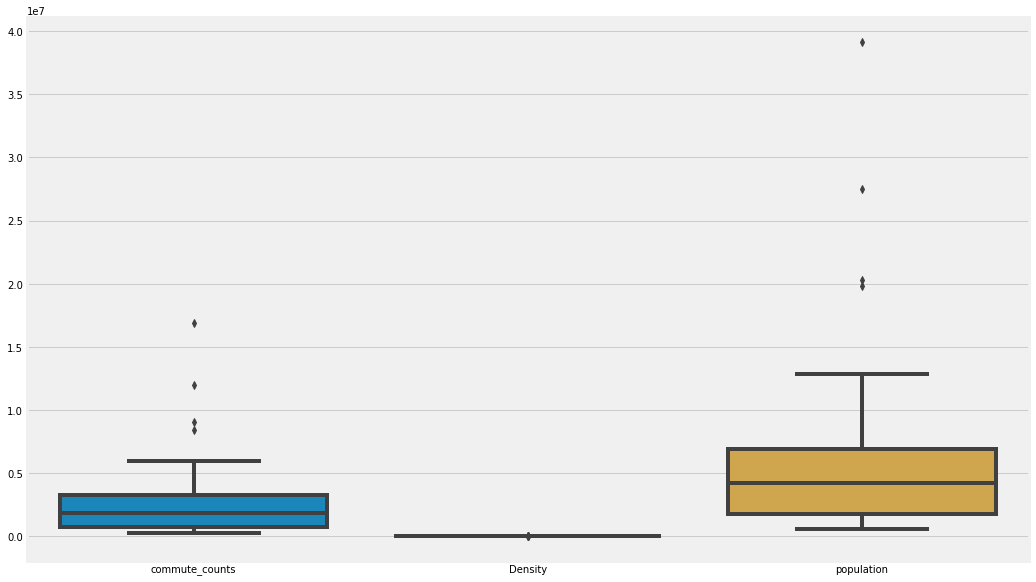

In [374]:
# Boxplot for all
plt.figure(figsize=(16, 10))
sns.boxplot(data=data)

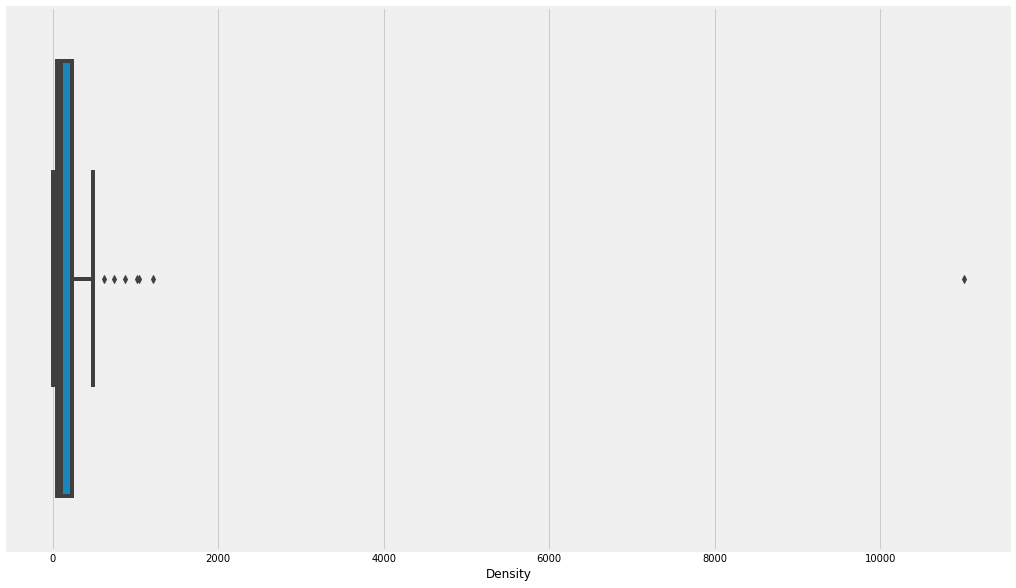

In [375]:
plt.figure(figsize=(16, 10))
sns.boxplot(x=data['Density'])

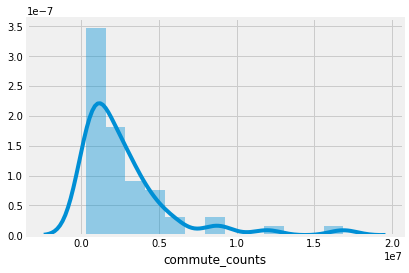

In [376]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(data.commute_counts)

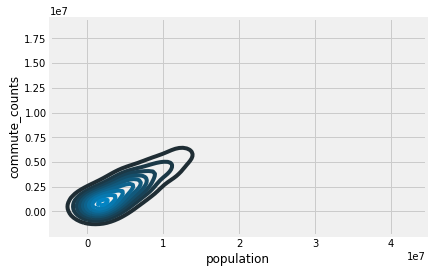

In [377]:
# Density Plot
sns.kdeplot(data.population, data.commute_counts)

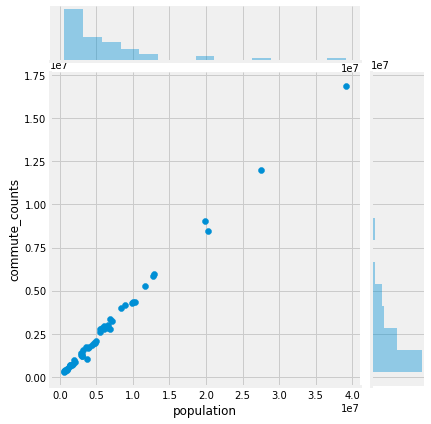

In [378]:
# Joint Distribution Plot
sns.jointplot(x='population', y='commute_counts', data=data)

In [379]:
# identify Z score for buyout
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data.Density))
print(z)

[2.18152589e-01 2.80434573e-01 2.41342689e-01 2.43330412e-01
 1.14790998e-01 2.46643284e-01 2.09870410e-01 4.02513888e-02
 7.01450848e+00 3.06440614e-02 1.63821496e-01 1.34005652e-01
 2.67845661e-01 1.28042484e-01 1.59183476e-01 2.44655561e-01
 2.57244472e-01 2.06888825e-01 2.09539123e-01 2.52606452e-01
 1.28373771e-01 2.96005069e-01 1.65146645e-01 2.36042095e-01
 2.39354966e-01 2.22790609e-01 2.76459127e-01 2.65195364e-01
 2.63870215e-01 1.83036151e-01 5.25918351e-01 2.69833384e-01
 2.81594078e-03 1.44606841e-01 2.74471404e-01 9.29260457e-02
 2.43330412e-01 2.53931601e-01 9.16008971e-02 4.11955572e-01
 3.95391214e-01 1.73760110e-01 2.73808830e-01 1.75085259e-01
 2.11526846e-01 2.57244472e-01 2.36704669e-01 1.40631395e-01
 2.10201697e-01 2.30741500e-01 2.10864271e-01 2.77121701e-01]


In [380]:
# identify array for z score greater than 3 (outlier)
threshold = 3
print(np.where(z > 3))

(array([8]),)


In [381]:
# locate the data
data.iloc[8]

state_name        District of Columbia
commute_counts                  335224
State             District of Columbia
Density                          11011
population                      672228
Name: 8, dtype: object

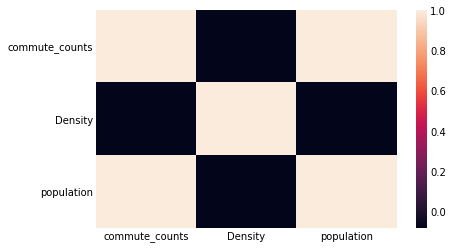

In [382]:
# Calculate correlations
corr = data.corr()
 
# Heatmap
sns.heatmap(corr)

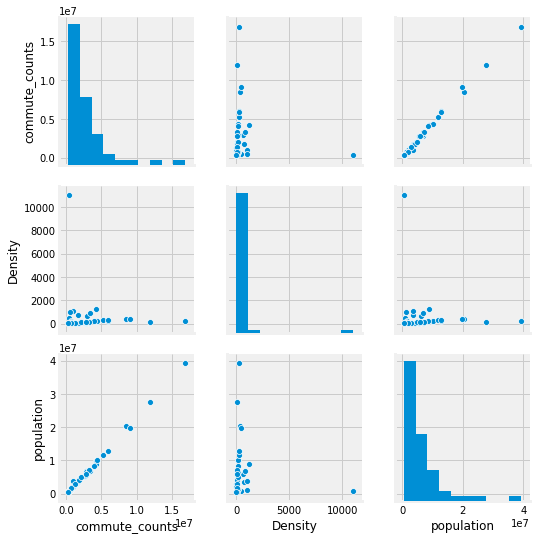

In [383]:
# pairplots showing the relationship and distribution
sns.pairplot(data)

(0, 20000000)

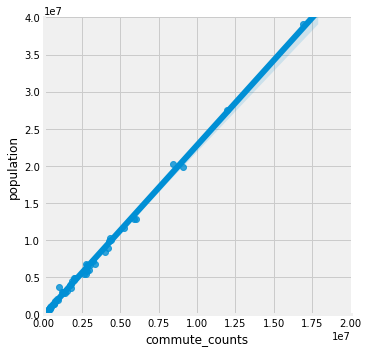

In [384]:
sns.lmplot(x='commute_counts', y='population', data=data)
plt.ylim(0, 40000000)
plt.xlim(0, 20000000)

In [0]:
# create training and test datasets
np.random.seed(1234)
data['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(data))
data_train = data[data['runiform'] >= 0.33]
data_test = data[data['runiform'] < 0.33]

In [386]:
# check test data frame
print('\SusItems_test data frame (rows, columns): ',data_test.shape)
print(data_test.head())

\SusItems_test data frame (rows, columns):  (14, 6)
     state_name  commute_counts        State  Density  population  runiform
0       Alabama         1995472      Alabama       95     4858979  0.191519
5      Colorado         2606591     Colorado       52     5456574  0.272593
6   Connecticut         1748352  Connecticut      741     3590886  0.276464
17     Kentucky         1864524     Kentucky      112     4425092  0.013768
22     Michigan         4279616     Michigan      175     9922576  0.075381


In [387]:
# review results by variables
# specify a simple model
my_model = str('commute_counts ~ population + Density')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = data_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:         commute_counts   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     4834.
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.78e-43
Time:                        03:03:39   Log-Likelihood:                -519.54
No. Observations:                  38   AIC:                             1045.
Df Residuals:                      35   BIC:                             1050.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.722e+04   4.84e+04      1.389      0.1

In [388]:
geo = pd.read_html("https://inkplant.com/code/state-latitudes-longitudes",
                         index_col=0, attrs={"class":"table table-hover"}, header=0)[0]
geo.reset_index(inplace = True)
geo.head()

,State,Latitude,Longitude
0,Alabama,32.806671,-86.791130
1,Alaska,61.370716,-152.404419
2,Arizona,33.729759,-111.431221
3,Arkansas,34.969704,-92.373123
4,California,36.116203,-119.681564


In [0]:
# Combine datasets
datageo = data.merge(geo, 
                        left_on='state_name', 
                        right_on='State', 
                        how='inner', 
                        suffixes=["","_2"] #since they are the same name, we need a suffix
                       )

In [390]:
datageo.head()

,state_name,commute_counts,State,Density,population,runiform,State_2,Latitude,Longitude
0,Alabama,1995472,Alabama,95,4858979,0.191519,Alabama,32.806671,-86.791130
1,Alaska,356987,Alaska,1,738432,0.622109,Alaska,61.370716,-152.404419
2,Arizona,2777754,Arizona,60,6828065,0.437728,Arizona,33.729759,-111.431221
3,Arkansas,1236999,Arkansas,57,2978204,0.785359,Arkansas,34.969704,-92.373123
4,California,16869052,California,251,39144818,0.779976,California,36.116203,-119.681564


In [391]:
datageo.dtypes

state_name         object
commute_counts      int64
State              object
Density             int64
population          int64
runiform          float64
State_2            object
Latitude          float64
Longitude         float64
dtype: object

In [392]:
datageo.head()

,state_name,commute_counts,State,Density,population,runiform,State_2,Latitude,Longitude
0,Alabama,1995472,Alabama,95,4858979,0.191519,Alabama,32.806671,-86.791130
1,Alaska,356987,Alaska,1,738432,0.622109,Alaska,61.370716,-152.404419
2,Arizona,2777754,Arizona,60,6828065,0.437728,Arizona,33.729759,-111.431221
3,Arkansas,1236999,Arkansas,57,2978204,0.785359,Arkansas,34.969704,-92.373123
4,California,16869052,California,251,39144818,0.779976,California,36.116203,-119.681564


In [393]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

datageo.head()

datageo['text'] = datageo['State'] + ', ' + datageo['commute_counts'].astype(str)

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ go.Scattergeo(
        locationmode = 'ISO-3',
        lon = datageo['Longitude'],
        lat = datageo['Latitude'],
        text = datageo['text'],
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            color = datageo['commute_counts'],
            cmax = datageo['commute_counts'].max(),
            colorbar=dict(
                title=""
            )
        ))]

layout = dict(
        title = 'Commute<br>2015', 
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5        
        ),
    )

fig = go.Figure(data=data, layout=layout )
py.iplot(fig, filename='d3-airports' )